Menyimpan Model Keras

In [ ]:
from tensorflow.keras.datasets import mnist
(feature_train, label_train), (feature_test, label_test) = mnist.load_data()

Feature Engineering

In [ ]:
feature_train = feature_train.reshape((feature_train.shape[0], 28, 28, 1))
feature_test = feature_test.reshape((feature_test.shape[0], 28, 28, 1))

In [ ]:
from tensorflow.keras.utils import to_categorical
label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

print(label_train)

In [ ]:
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')

feature_train = feature_train / 255.0
feature_test = feature_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [ ]:
base_model = Sequential()

base_model.add(Flatten(input_shape=(28, 28, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
base_model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

base_model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = "weights-improvement-best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Tensorboard

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) 
callbacks_list.append(TensorBoard(logdir, histogram_freq=1))

In [ ]:
base_model.fit(feature_train, label_train, batch_size=128, validation_data=(feature_test, label_test), epochs=100, callbacks=callbacks_list, verbose=0)

Load extension di jupyter notebook

In [ ]:
%load_ext tensorboard

Load tensorboard di dalam jupyter notebook

In [ ]:
%tensorboard --logdir logs

In [ ]:
model_filename = "weights-improvement-best.h5"

base_model.load_weights(model_filename)
base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Prediksi terhadap validation data

In [ ]:
predictions = base_model.predict(feature_test)
predictions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Dari semua output score(output dapatkan dengan nilai paling tinggi)

In [ ]:
np.argmax(predictions[0])

In [ ]:
np.argmax(predictions[1])

In [ ]:
plt.imshow(feature_test[0].reshape(28, 28), cmap=plt.get_cmap('gray'))

Prediksi terhadap gambar baru

In [ ]:
import cv2 as cv

In [ ]:
image = cv.imread('/content/drive/My Drive/Images/sample.jpg',0)

image = image.astype('float32')

image = image / 255.0

In [ ]:
plt.imshow(image)

In [ ]:
image = image.reshape(1, 28, 28, 1)

In [ ]:
predictions = base_model.predict(image)
predictions

Dari semua output score (output didapatkan dengan nilai tertinggi)

In [ ]:
np.argmax(predictions[0])

Implementasi di Python

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, flash, request, redirect, url_for, jsonify
from werkzeug.utils import secure_filename

In [ ]:
app = Flask(__name__)
UPLOAD_FOLDER = '/content/'
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

@app.route("/home")
def home():
    html="""<html>
    <body>

    <form action="/classify" method="post" enctype="multipart/form-data">
    Select image to upload:
    <input type="file" name="fileToUpload" id="fileToUpload">
    <input type="submit" value="Upload Image" name="submit">
    </form>
    </body>
    </html>"""

    return html

In [ ]:
@app.route('/classify', methods=['POST'])
def classify():
    file = request.files['fileToUpload']
    if file:
        filename = secure_filename(file.filename)
        file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))

    image = cv.imread(UPLOAD_FOLDER+filename ,0)
    image = image.astype('float32')
    image = image / 255.0
    image = image.reshape(1, 28, 28, 1)

    base_model.load_weights('weights-improvement-best.h5')
    base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    predictions = base_model.predict(image)
    nilai = np.argmax(predictions[0]).tolist()

    return jsonify({"output": nilai})

In [ ]:
run_with_ngrok(app)

app.run()

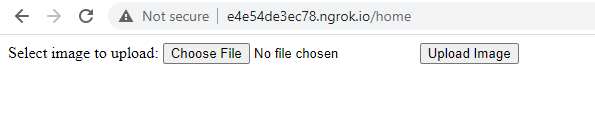

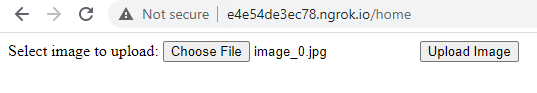

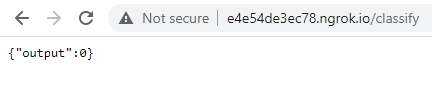

Hasil prediksi telah sesuai dengan isi dari gambar yang di input